In [845]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [846]:
#Importing the dataset
bikeday = pd.read_csv(r'C:\Users\Advaith R\Downloads\day.csv')
bikeday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [847]:
#Data Preparation

In [848]:
#Dropping unnecessary columns such as instant,dteday,casual,registered
bikeday = bikeday.drop('instant',axis=1)
bikeday = bikeday.drop('dteday',axis=1)
bikeday = bikeday.drop('casual',axis=1)
bikeday = bikeday.drop('registered',axis=1)

In [849]:
bikeday.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [850]:
bikeday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [851]:
#Mapping categorical variables to convert their datatype to object datatype
#1.season
bikeday[['season']]=bikeday[['season']].apply(lambda x: x.map({1: 'spring', 2: 'summer', 3: 'fall', 4:'winter'}))
bikeday.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [852]:
#2.month
bikeday[['mnth']]=bikeday[['mnth']].apply(lambda x: x.map({1: 'jan', 2: 'feb', 3: 'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}))
bikeday.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [853]:
#3.weekday
bikeday[['weekday']]=bikeday[['weekday']].apply(lambda x: x.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4:'thursday', 5:'friday', 6:'saturday'}))
bikeday.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [854]:
#4.weathersit
bikeday[['weathersit']]=bikeday[['weathersit']].apply(lambda x: x.map({1: 'clear', 2: 'mist and cloudy', 3: 'light rain and snow', 4:'heavy rain and snow'}))
bikeday.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,mist and cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,mist and cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [743]:
#Data Visualisation
#Performing EDA with various variables

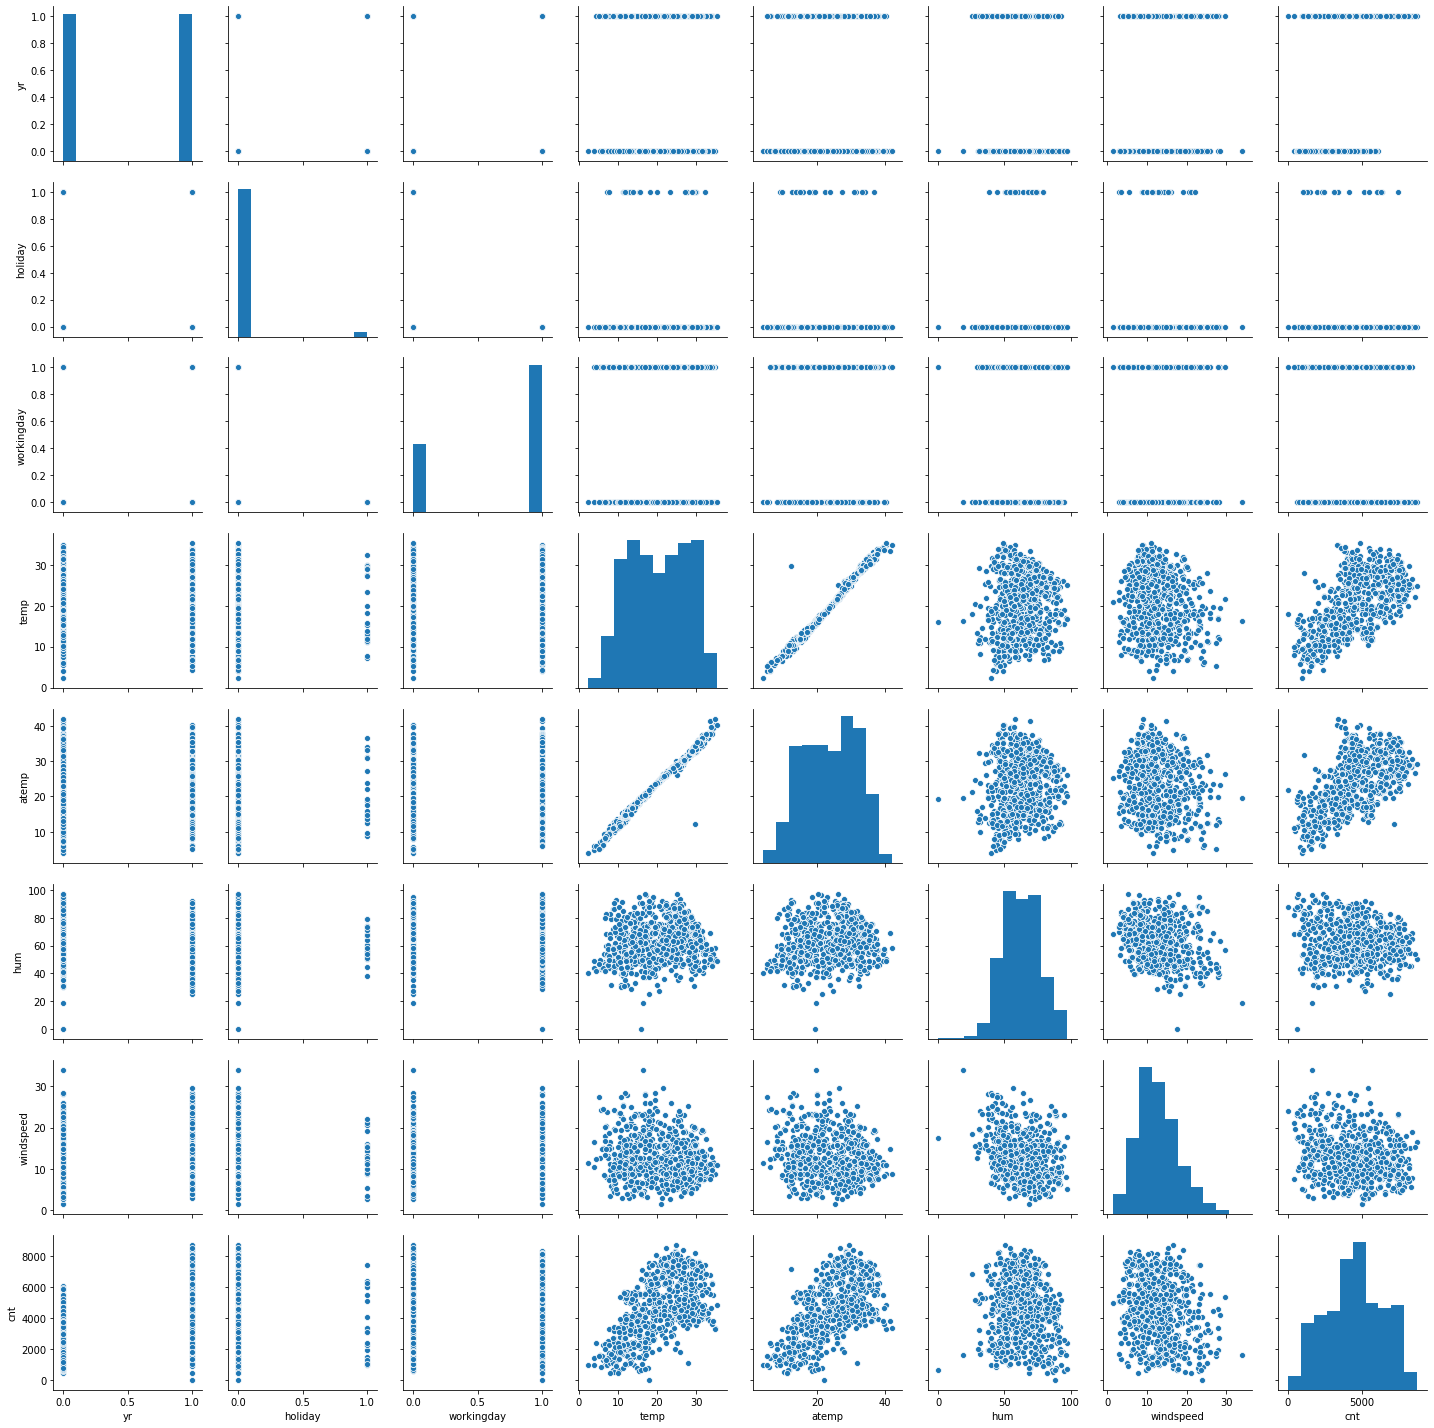

In [744]:
#Making pairplot with all numerical variables
sns.pairplot(bikeday)
plt.show()

In [745]:
#As we can see, there is some relation between temp/atemp and the target variable(cnt)
#and we can see some relation between hum v/s cnt, and windspeed v/s cnt as well. But it is all scattered around.

In [746]:
#Visualising Categorical Variables
#Let's make a boxplot for some of these variables.

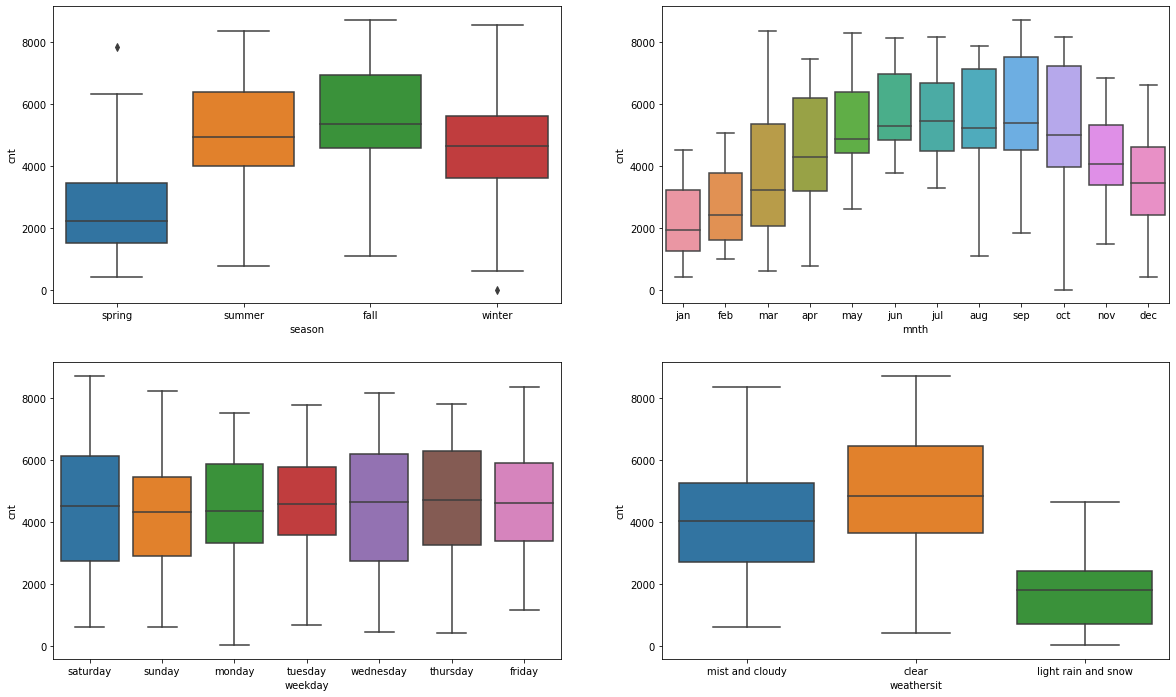

In [747]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeday)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeday)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeday)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeday)
plt.show()

In [748]:
#From the first boxplot we can make out that there is more demand during the summer and fall seasons
#The second boxplot also reassures the same, in terms of months
#The 3rd boxplot shows that the demand in weekends and weekdays are not having much significance
#The 4th boxplot shows the demand to be higher during clear and cloudy weather.


In [855]:
##Dummy Variables
#1.season1

#Dropping the first column
season1 = pd.get_dummies(bikeday['season'], drop_first = True)

# Add the results to the original bike dataframe
bikeday = pd.concat([bikeday, season1], axis = 1)
bikeday.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,saturday,0,mist and cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,sunday,0,mist and cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [856]:
# Drop 'season' as we have created the dummies for it
bikeday.drop(['season'], axis = 1, inplace = True)

bikeday.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,saturday,0,mist and cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,jan,0,sunday,0,mist and cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [857]:
#2.month1

#Dropping the first column
month1 = pd.get_dummies(bikeday['mnth'], drop_first = True)

# Add the results to the original bike dataframe
bikeday = pd.concat([bikeday, month1], axis = 1)
bikeday.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,jan,0,saturday,0,mist and cloudy,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,sunday,0,mist and cloudy,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [858]:
# Drop 'mnth' as we have created the dummies for it
bikeday.drop(['mnth'], axis = 1, inplace = True)

bikeday.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,saturday,0,mist and cloudy,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sunday,0,mist and cloudy,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [859]:
#3.weekday

#Dropping the first column
weekday1 = pd.get_dummies(bikeday['weekday'], drop_first = True)

# Add the results to the original bike dataframe
bikeday = pd.concat([bikeday, weekday1], axis = 1)

# Drop 'mnth' as we have created the dummies for it
bikeday.drop(['weekday'], axis = 1, inplace = True)

bikeday.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,0,mist and cloudy,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,mist and cloudy,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [860]:
#4.weathersit

#Dropping the first column
weathersit1 = pd.get_dummies(bikeday['weathersit'], drop_first = True)

# Add the results to the original bike dataframe
bikeday = pd.concat([bikeday, weathersit1], axis = 1)

# Drop 'mnth' as we have created the dummies for it
bikeday.drop(['weathersit'], axis = 1, inplace = True)

bikeday.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light rain and snow,mist and cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [861]:
#Now we need only one of temp and atemp for analysis. So lets use temp and drop atemp 
bikeday = bikeday.drop('atemp',axis=1)

In [862]:
bikeday.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light rain and snow,mist and cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [863]:
#Splitting the Data into Training and Testing Sets


np.random.seed(0)  #This is done to make sure train and test data do not contain the same values.
df_train, df_test = train_test_split(bikeday, train_size = 0.7, test_size = 0.3, random_state = 100)

In [864]:
#ReScaling
#Rescaling all variables except dummies, using MinMaxScalar

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed']

df_train[var] = scaler.fit_transform(df_train[var])


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [865]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light rain and snow,mist and cloudy
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


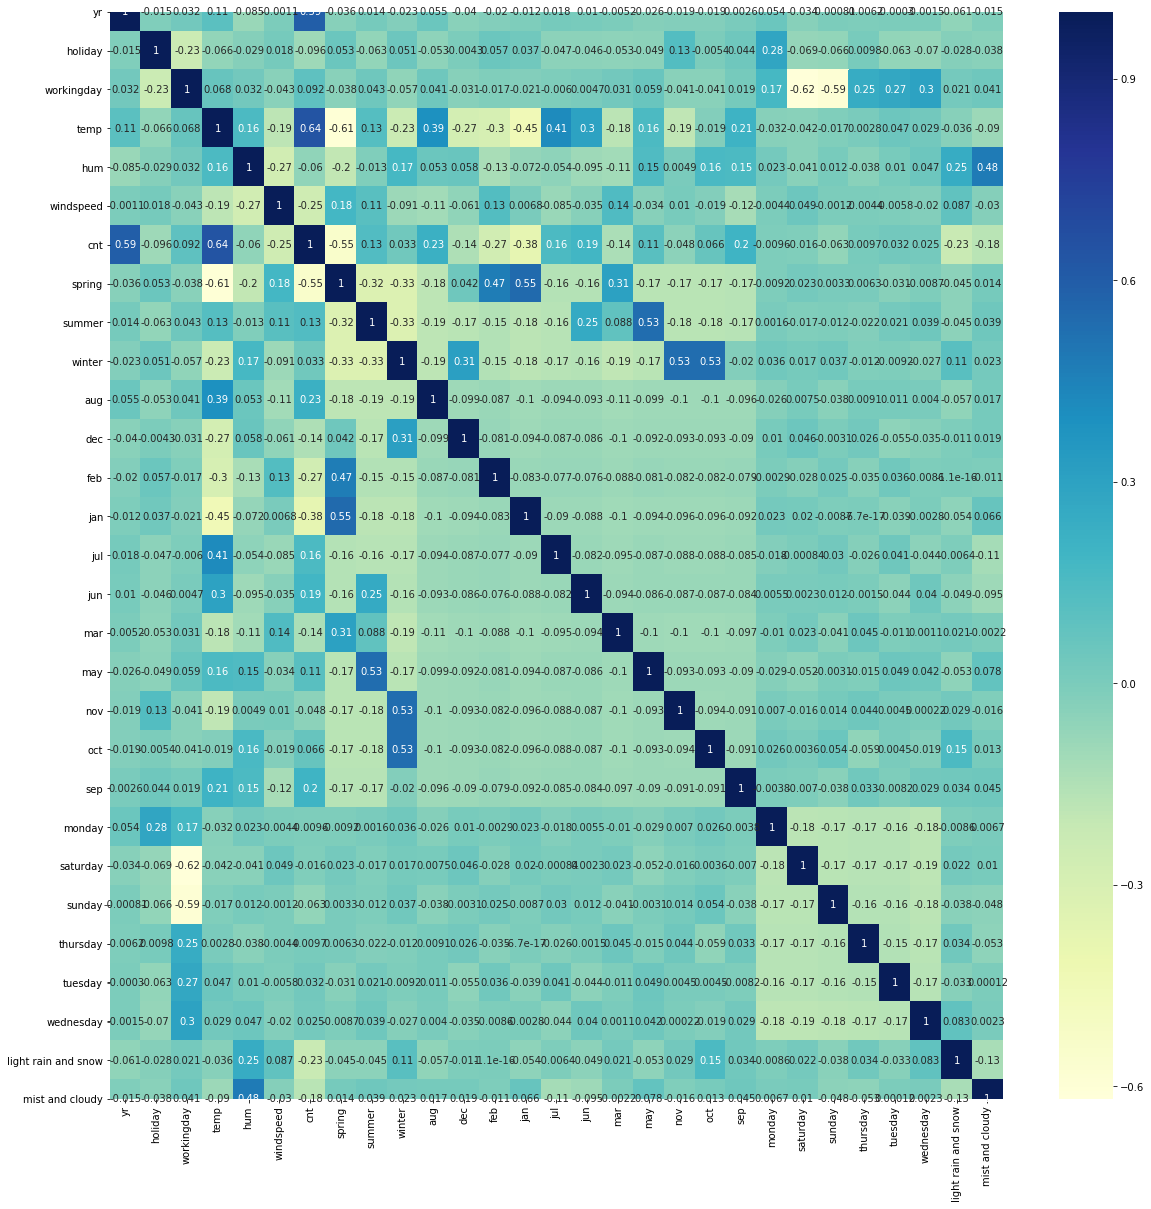

In [866]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [867]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train


In [868]:
#Building a linear model
#We will be using Recurrsive feature Elimation (RFE)
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [869]:
#getting a list of which variables are selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('monday', False, 8),
 ('saturday', True, 1),
 ('sunday', False, 6),
 ('thursday', False, 11),
 ('tuesday', False, 9),
 ('wednesday', False, 12),
 ('light rain and snow', True, 1),
 ('mist and cloudy', True, 1)]

In [870]:
#From the above list, the ones with 1 as their rank are being selected for analysis
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'jul', 'sep', 'saturday',
       'light rain and snow', 'mist and cloudy'],
      dtype='object')

In [871]:
#Other variables would be as follows
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'monday',
       'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [872]:
# Creating X_test_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [873]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [874]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [875]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        20:57:58   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2204.0556    

In [876]:
X_train_rfe = X_train_rfe.drop('const',axis=1)

In [877]:
#Looking at a p-values, we can see that some variables aren't really significant
#Let us reduce the variables using Varinace Inflation Factor(VIF)
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [878]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,mist and cloudy,2.29
0,yr,2.09
12,saturday,1.98


In [879]:
#As a general rule, we want variables with VIF value less than 5. So let us drop one variable at a time, that has VIF>5.
#Lets start with dropping hum variable (VIF=29.4) and update the model
X = X_train_rfe.drop('hum', 1,)

In [880]:
# Build the model
X_train_lm = sm.add_constant(X)

lm_2 = sm.OLS(y_train, X_train_lm).fit()

In [881]:
# Print the summary of the model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.33e-189
Time:                        20:58:00   Log-Likelihood:                -4114.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     495   BIC:                             8323.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1531.4807    

In [882]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,saturday,1.97
8,jan,1.62
9,jul,1.59


In [883]:
#We know that temp will play a major role in this, so we cannot drop it yet.
#Hence lets drop workingday(VIF=5.24) variable and update the model, and see if temp VIF reduces
X = X.drop('workingday', 1,)

In [884]:
# Build the model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.21e-186
Time:                        20:58:01   Log-Likelihood:                -4122.7
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     496   BIC:                             8333.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1865.5493    

In [885]:
#Calculating VIF once again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
4,spring,2.76
5,summer,2.23
0,yr,2.07
6,winter,1.80
7,jan,1.61
8,jul,1.59
12,mist and cloudy,1.56
9,sep,1.34


In [886]:
#From the summary, we can see that jan variable has a high p-value. Therefore let's drop it.
X = X.drop('jan', 1,)

In [887]:
# Build the model
X_train_lm = sm.add_constant(X)

lm_4 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.97e-187
Time:                        20:58:02   Log-Likelihood:                -4125.0
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     497   BIC:                             8331.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1727.1421    

In [888]:
#Calculating VIF once again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.12
3,windspeed,4.62
5,summer,2.22
4,spring,2.10
0,yr,2.07
6,winter,1.80
7,jul,1.58
11,mist and cloudy,1.55
8,sep,1.34
9,saturday,1.19


In [889]:
#From the summary, we can see that saturday has a high p-value. Therefore let's drop it.
X = X.drop('saturday', 1,)

In [890]:
# Build the model
X_train_lm = sm.add_constant(X)

lm_5 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.40e-187
Time:                        20:58:03   Log-Likelihood:                -4126.6
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     498   BIC:                             8328.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1757.3365    

In [891]:
#Calculating VIF once again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
7,jul,1.58
10,mist and cloudy,1.55
8,sep,1.34
9,light rain and snow,1.08


In [892]:
#Although temp still has VIF>5, let us drop windspeed and see whether the VIF of temp redues even further. 
#We refrain from dropping temp as we know from the plots above and the correlation that it plays an important role with 
#respect to the target variable. 
X = X.drop('windspeed', 1,)

In [893]:
# Build the model
X_train_lm = sm.add_constant(X)

lm_6 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.80e-181
Time:                        20:58:05   Log-Likelihood:                -4143.8
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     499   BIC:                             8356.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1328.1665    

In [894]:
#Calculating VIF once again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.22
0,yr,2.06
4,summer,1.93
5,winter,1.58
6,jul,1.58
9,mist and cloudy,1.55
3,spring,1.40
7,sep,1.34
8,light rain and snow,1.07
1,holiday,1.04


In [895]:
#Now we have got the variables down to 10 and the VIF of temp is less than 5
#Hence this will be our final model

#Now let us start with residual analysis
y_train_price = lm_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

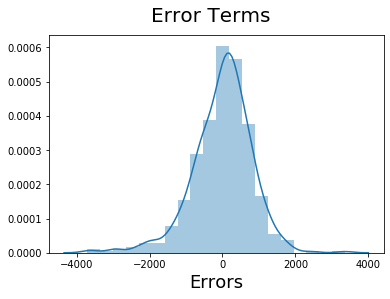

In [896]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [897]:
#So as you can see, the error terms are also normally distributed 

In [898]:
#Making Predictions
#Rescaling the test set
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed']

df_test[var] = scaler.fit_transform(df_test[var])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [899]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [900]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test_new)



C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [901]:
# Making predictions
y_pred = lm_6.predict(X_test_new)

In [908]:
#Finding the R squared of test dataset 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8050409976554342

In [906]:
#Hence R-squared for the train data set is 82.4%
#and R-squared for the test data set is 80.5%
#Therefore the final model that can be used is lm_6
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.80e-181
Time:                        21:09:36   Log-Likelihood:                -4143.8
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     499   BIC:                             8356.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1328.1665    

In [909]:
#Now the management of the company can use the above final model,and
#accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
#The top 3 features that are recommended for the management to use are:
#1. temp
#2. light rain and snow
#3. yr

#These features are selected based on their coefficient irrespective of the sign
#Higher the coefficient , the higher is the influence of it on the target variable.